In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer=Tokenizer()

data = " In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \n His father died and made him a man again \n Left him a farm and ten acres of ground. \n He gave a grand party for friends and relations \n Who didnt forget him when come to the wall, \n And if youll but listen Ill make your eyes glisten \n Of the rows and the ructions of Lanigan’s Ball. \n Myself to be sure got free invitation, \n For all the nice girls and boys I might ask, \n And just in a minute both friends and relations \n Were dancing round merry as bees round a cask. \n Judy ODaly, that nice little milliner, \n She tipped me a wink for to give her a call, \n And I soon arrived with Peggy McGilligan \n Just in time for Lanigans Ball. \n "

corpus=data.lower().split('\n')
tokenizer.fit_on_texts(corpus)
total_words= len(tokenizer.word_index)+1

In [ ]:
input_sequences=[]
for line in corpus:
  token_list=tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence=token_list[:i+1]
    input_sequences.append(n_gram_sequence)

print(input_sequences[:5])

[[6, 3], [6, 3, 17], [6, 3, 17, 4], [6, 3, 17, 4, 18], [6, 3, 17, 4, 18, 19]]


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_sequence_len=max([len(x) for x in input_sequences])
input_sequences=np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [ ]:
print(input_sequences[:5])

[[ 0  0  0  0  0  0  0  0  0  6  3]
 [ 0  0  0  0  0  0  0  0  6  3 17]
 [ 0  0  0  0  0  0  0  6  3 17  4]
 [ 0  0  0  0  0  0  6  3 17  4 18]
 [ 0  0  0  0  0  6  3 17  4 18 19]]


In [ ]:
xs, labels= input_sequences[:,:-1], input_sequences[:,-1]

In [ ]:
ys= tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(total_words, 8))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_sequence_len-1)))
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=model.fit(xs, ys, epochs=1500, verbose=1)

Epoch 1/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0000e+00 - loss: 4.5758
Epoch 2/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0119 - loss: 4.5729   
Epoch 3/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0686 - loss: 4.5702 
Epoch 4/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0696 - loss: 4.5684 
Epoch 5/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0967 - loss: 4.5645 
Epoch 6/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0790 - loss: 4.5620 
Epoch 7/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0675 - loss: 4.5595 
Epoch 8/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0644 - loss: 4.5570
Epoch 9/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0540 - loss: 4.5570 
Epoch 10/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0686 - loss: 4.5501 
Epoch 11/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0790 - loss: 4.5426 
Epoch 12/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accur

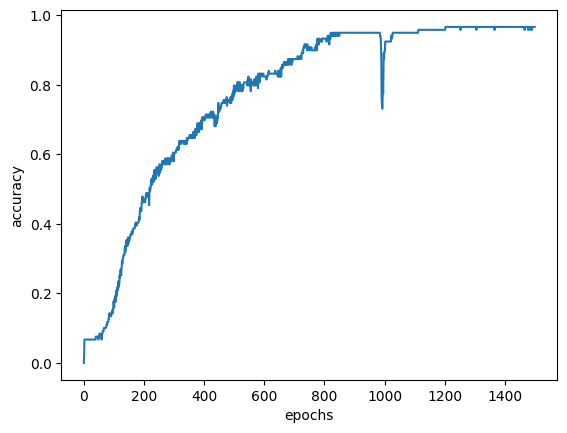

In [ ]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
loss=history.history['loss']
plt.plot(acc)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
seed_text= 'in the town of athy'
token_list=tokenizer.texts_to_sequences([seed_text])[0]
token_list=pad_sequences([token_list],
                         maxlen=max_sequence_len-1, padding='pre')

In [ ]:
predicted=np.argmax(model.predict(token_list), axis=-1)
print(predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
[19]


In [ ]:
for word, index in tokenizer.word_index.items():
  if index==predicted:
    print(word)
    break

one


In [ ]:
seed_text1='sweet jeremy saw dublin'
token_list1=tokenizer.texts_to_sequences([seed_text1])[0]
token_list1=pad_sequences([token_list1],
                          maxlen=max_sequence_len-1, padding='pre')

In [ ]:
predicted1=np.argmax(model.predict(token_list1), axis=1)
print(predicted1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[42]


In [ ]:
for word, index in tokenizer.word_index.items():
  if index==predicted1:
    print(word)
    break

didnt


In [ ]:
seed_text='sweet jeremy saw dublin'
next_words=10

for _ in range(next_words):
  token_list=tokenizer.texts_to_sequences([seed_text])[0]
  token_list=pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted=np.argmax(model.predict(token_list, verbose=0), axis=-1)
  output_word=''

  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word=word
      break
  seed_text+= ' '+ output_word
print(seed_text)

sweet jeremy saw dublin didnt forget him and the ground ground ground glisten ball


In [ ]:
!wget --no-check-certificate \
 https://storage.googleapis.com/laurencemoroney-blog.appspot.com/ \
 irish-lyrics-eof.txt-O /tmp/irish-lyrics-eof.txt

--2024-11-28 04:10:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.207, 172.217.204.207, 172.217.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.207|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-11-28 04:10:45 ERROR 404: Not Found.

--2024-11-28 04:10:45--  http://irish-lyrics-eof.txt-o/
Resolving irish-lyrics-eof.txt-o (irish-lyrics-eof.txt-o)... failed: Name or service not known.
wget: unable to resolve host address ‘irish-lyrics-eof.txt-o’
/tmp/irish-lyrics-eof.txt: Scheme missing.


In [ ]:
data=open('/content/drive/MyDrive/irish-lyrics-eof.txt').read()
corpus=data.lower().split('\n')